<a href="https://colab.research.google.com/github/barish-bit/Neural_Network-based_Climate_Data_Forecasting/blob/main/Chaotic_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

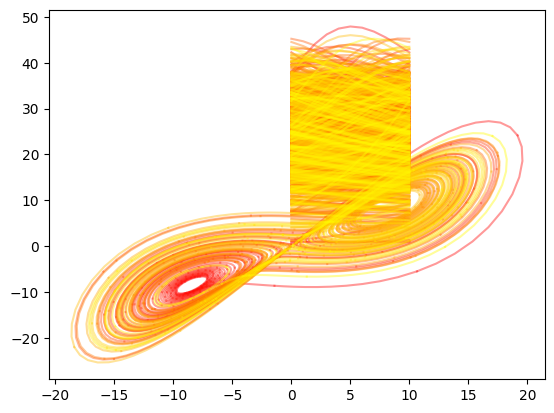

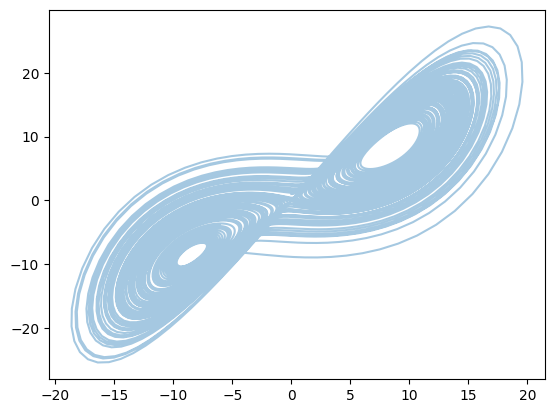

In [ ]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Lorenz paramters and initial conditions
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05

# Maximum time point and total number of time points
tmax, n = 100, 10000
# tmax, n = 100, 1000


def lorenz(x, t, sigma, beta, rho):
    """The Lorenz equations
    """
    u, v, w = x
    up = - sigma * (u - v)
    vp = rho * u - v - u * w
    wp = - beta * w + u * v
    return up, vp, wp


# Integrate the Lorenz equations on the time grid t
t = np.linspace(0, tmax, n)
f = odeint(lorenz, (u0, v0, w0), t, args=(sigma, beta, rho))
x, y, z = f.T

# Plot the Lorenz attractor using a Matplotlib 3D projection
fig = plt.figure()
ax = fig.gca()

# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 10
c = np.linspace(0,1,n)
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=(1,c[i],0), alpha=0.4)

# ax.plot(x, y, z, alpha=0.4)

# Remove all the axis clutter, leaving just the curve.
# ax.set_axis_off()

plt.show()




# Plot the Lorenz attractor using a Matplotlib 3D projection
fig = plt.figure()
ax = fig.gca()
ax.plot(x, y, alpha=0.4)

# Remove all the axis clutter, leaving just the curve.
# ax.set_axis_off()

plt.show()

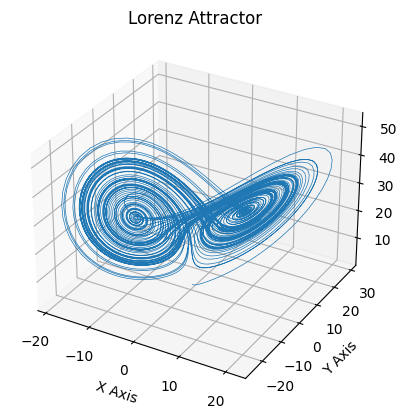

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def lorenz(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])

dt = 0.01
num_steps = 10000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [ ]:
pip install keras-beats

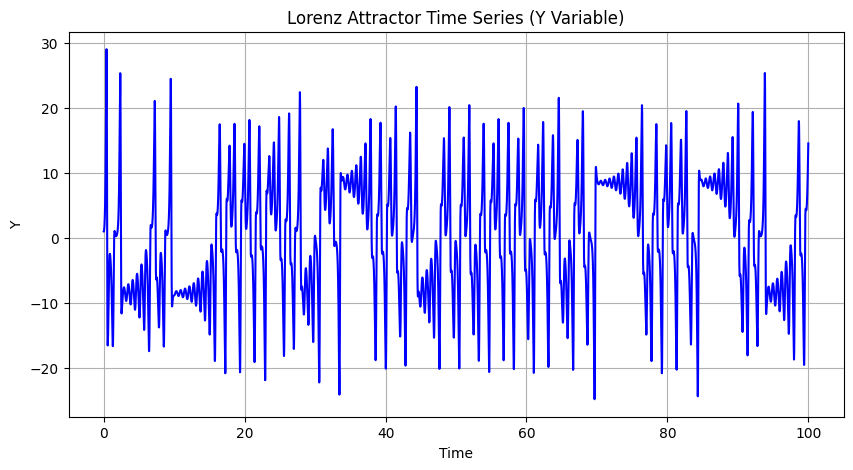

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def lorenz(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])

dt = 0.01
num_steps = 10000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Extract the y variable for the time series
time_series = xyzs[:, 1]

# Create the time steps
time_steps = np.arange(0, num_steps + 1) * dt

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(time_steps, time_series, color='blue')
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Lorenz Attractor Time Series (Y Variable)')
plt.grid(True)
plt.show()


In [ ]:
print(len(time_series))
a=min(time_series)
b=max(time_series)
print(a,b)
c=(b-a)/5
print(c)
list1=[]

for i in range(5):

  list1.append(a+(c*(i)))
list1.append(b)
print(list1)




10001
-24.738583131309618 28.981277697415116
10.743972165744946
[-24.738583131309618, -13.994610965564672, -3.2506387998197255, 7.493333365925217, 18.237305531670167, 28.981277697415116]


In [ ]:
import pandas as pd


start='1980-01-01'
days = len(time_series) - 1
end = pd.to_datetime(start) + pd.DateOffset(days=days)

date=pd.date_range(start, end)

data={'Dates':date,'Mean_temp': time_series}
df=pd.DataFrame(data)
df.head()
df.to_csv("Chaotic_timeseries.csv")
df.head()

,Dates,Mean_temp
0,1980-01-01,1.000000
1,1980-01-02,0.990000
2,1980-01-03,1.007078
3,1980-01-04,1.048045
4,1980-01-05,1.110761


In [ ]:
# import libraries
import pandas as pd
from kerasbeats import prep_time_series, NBeatsModel
# import the dataset
df = pd.read_csv('Chaotic_timeseries.csv', parse_dates = ['Dates'], index_col = 'Dates')
# sort by dates
df.sort_index(inplace = True)
# prep a univariate time series for N-Beats
X, y = prep_time_series(df['Mean_temp'], lookback = 3, horizon = 1)
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size = 1000)



#nbeats = NBeatsModel(model_type = 'generic', lookback = 3, horizon = 1, batch_size=1024)

nbeats=NBeatsModel( model_type = 'generic', lookback = 3,horizon = 1,
                   num_generic_neurons = 256, num_generic_stacks = 15, num_generic_layers = 3,
                   num_trend_neurons = 256, num_trend_stacks = 3, num_trend_layers = 4,
                   num_seasonal_neurons= 4096, num_seasonal_stacks = 3, num_seasonal_layers= 4,
                   num_harmonics= 1, polynomial_term= 2, loss = 'mae', learning_rate= 0.001, batch_size = 1024)

nbeats.fit(X, y, epochs = 10, validation_data=(X_test,y_test))

Epoch 1/10
10/10 [==============================] - 22s 756ms/step - loss: 5.3441 - mae: 5.3441 - mape: 209.0987 - val_loss: 1.4163 - val_mae: 1.4163 - val_mape: 40.6460
Epoch 2/10
10/10 [==============================] - 6s 584ms/step - loss: 0.8486 - mae: 0.8486 - mape: 41.2383 - val_loss: 0.4783 - val_mae: 0.4783 - val_mape: 16.5782
Epoch 3/10
10/10 [==============================] - 5s 493ms/step - loss: 0.4572 - mae: 0.4572 - mape: 21.2446 - val_loss: 0.4283 - val_mae: 0.4283 - val_mape: 14.2290
Epoch 4/10
10/10 [==============================] - 5s 540ms/step - loss: 0.4265 - mae: 0.4265 - mape: 18.4354 - val_loss: 0.4309 - val_mae: 0.4309 - val_mape: 14.2799
Epoch 5/10
10/10 [==============================] - 4s 451ms/step - loss: 0.4215 - mae: 0.4215 - mape: 18.5991 - val_loss: 0.4305 - val_mae: 0.4305 - val_mape: 14.8846
Epoch 6/10
10/10 [==============================] - 5s 465ms/step - loss: 0.4232 - mae: 0.4232 - mape: 18.1710 - val_loss: 0.4383 - val_mae: 0.4383 - val_mape

In [ ]:
nbeats.evaluate(X_test, y_test)

32/32 [==============================] - 1s 21ms/step - loss: 0.4232 - mae: 0.4232 - mape: 14.2938


[0.4232248067855835, 0.4232248067855835, 14.293771743774414]

32/32 [==============================] - 1s 11ms/step
[[17.927019119262695], [18.768436431884766], [19.508041381835938], [20.10394859313965], [20.51020050048828], [20.676939010620117], [20.557968139648438], [20.112586975097656], [19.31212615966797], [18.13401222229004], [16.598020553588867], [14.749361991882324], [12.66295337677002], [10.36711311340332], [8.008856773376465], [5.690539360046387], [3.4895379543304443], [1.4679213762283325], [-0.2853151261806488], [-1.730237603187561], [-2.921452045440674], [-3.85760235786438], [-4.534066677093506], [-5.002552032470703], [-5.308713912963867], [-5.4943060874938965], [-5.593869686126709], [-5.614863872528076], [-5.594760894775391], [-5.552791595458984], [-5.500122547149658], [-5.450701713562012], [-5.521466255187988], [-5.492100238800049], [-5.48114013671875], [-5.491570949554443], [-5.525947570800781], [-5.585294723510742], [-5.670036315917969], [-5.780196189880371], [-5.916110992431641], [-6.077579498291016], [-6.264439105987549], [-6.476

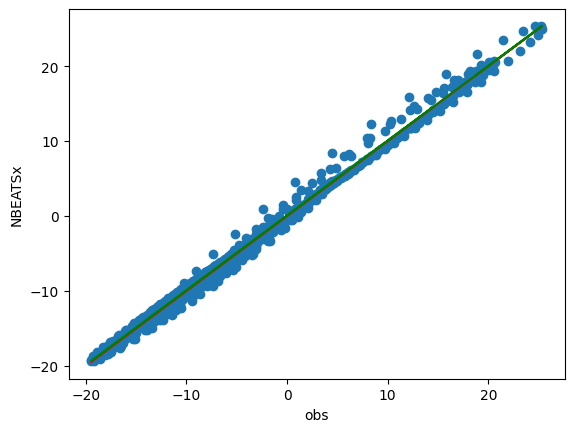

[-0.7948748383751685, -0.6933175175563342, -0.5508974014892978, -0.36379765462267244, -0.1299150374739746, 0.14803480775244893, 0.4655739302389783, 0.8127699709607654, 1.1747962779233845, 1.5205344913676129, 1.8351561993516636, 2.1026481653508426, 2.3135692633787475, 2.3963762964054984, 2.393470403474266, 2.3096813774444906, 2.1424064092868935, 1.8982339399338197, 1.637566599036302, 1.396688915481759, 1.1372649195026758, 0.8904164355073583, 0.6977166929511114, 0.5463942554981394, 0.42803272614254073, 0.3342233732348676, 0.2588751786082337, 0.2179174888864246, 0.19254180797305764, 0.1780441012432883, 0.17431754340614347, 0.17565919486002635, 0.07114675370500123, 0.08537873083343861, 0.10277904865999954, 0.12233087035412371, 0.14271600123595451, 0.16361785697779663, 0.18494743726009943, 0.206759059160043, 0.22862223118410796, 0.2505309802117379, 0.27236429208849167, 0.29411591775055435, 0.3156634167832557, 0.3370500451334797, 0.358180216228388, 0.37897318394671586, 0.3991319787317238, 0.

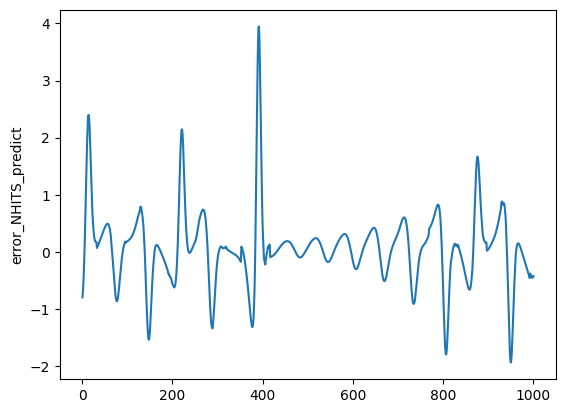

max_error 3.9454924359753916
min_error -1.933285720793818
sd_error 0.660144739736629
error
median 0.07924129492791016
25_parcentile -0.16984893774468457
75_parcentile 0.28853523310412
mae 0.42322485910604685
mse 0.44145245411566314
var_obs 73.63756274746173
var_exp_pred 73.88834836428259
var_error 0.4357910774019416
co_variance 73.61867869586706
co_variance_matrix [[73.71127402 73.6186787 ]
 [73.6186787  73.96231067]]
[17, 34, 32, 34, 11]
[12, 29, 29, 28, 9]
128
[0.7058823529411765, 0.8529411764705882, 0.90625, 0.8235294117647058, 0.8181818181818182]


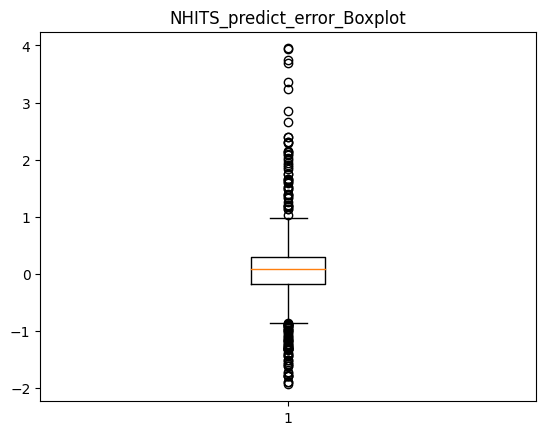

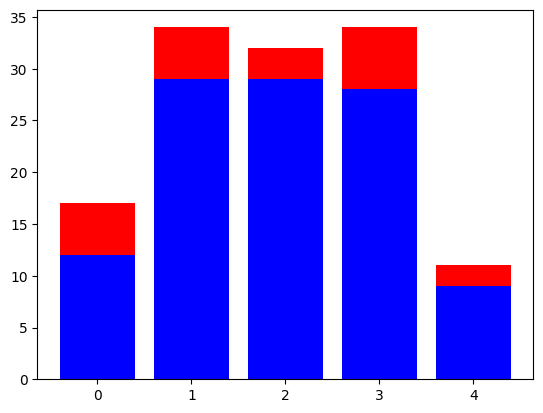

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
nbeats.evaluate(X_test, y_test)

df1=pd.read_csv("/content/Chaotic_timeseries.csv")
obs=df1["Mean_temp"][-1000:].tolist()

forecasts=nbeats.predict(X_test)
exp_pred=forecasts.tolist()
print(exp_pred)
pred=[]
for i in range (len(exp_pred)):
  pred.append(exp_pred[i][0])
print(pred)
print(df1["Mean_temp"][-1000:].tolist())





#df=pd.read_csv('/content/deep3.csv')
df1=pd.read_csv("/content/Chaotic_timeseries.csv")
obs=df1["Mean_temp"][-1000:].tolist()
exp_pred=pred





#perfect prediction and recent prediction

plt.scatter(obs, exp_pred)
plt.plot(obs,obs, color='r')

model = LinearRegression()
obs = np.array(obs).reshape(-1, 1)
model.fit(obs, np.array(exp_pred))
y_pred = model.predict(obs)
plt.plot(obs,y_pred, color='g')


plt.xlabel("obs")
plt.ylabel("NBEATSx")
plt.show()




obs=df1["Mean_temp"][-1000:].tolist()
exp_pred=pred


error=[]
for i in range (len(obs)):
  error.append(exp_pred[i]-obs[i])
print(error)


list1=[]
for i in range (len(obs)):
  list1.append(i+1)
plt.plot(list1,error)
plt.ylabel('error_NHITS_predict')
plt.show()

# information of error

print("max_error", np.max(error))
print("min_error", np.min(error))
print("sd_error", np.std(error))




#error box plot



plt.boxplot(error)
#plt.title("error-Boxplot")
#plt.show()


print("error")
print("median",np.median(error))
print("25_parcentile",np.percentile(error,25))
print("75_parcentile",np.percentile(error,75))

plt.title('NHITS_predict_error_Boxplot')



from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(obs, exp_pred)
mse=mean_squared_error(obs, exp_pred)
var_obs=np.var(obs)
var_exp_pred=np.var(exp_pred)
var_error=np.var(error)
cov=np.cov(obs,exp_pred)[0,1]
cov_matrix=np.cov(obs,exp_pred)

print("mae",mae)
print("mse",mse)
print("var_obs",var_obs)
print("var_exp_pred",var_exp_pred)
print("var_error",var_error)
print("co_variance",cov)
print("co_variance_matrix",cov_matrix)

####


list_obs=[]
list_pred=[]
list_pred1=[]
for i in range (5):
  list_obs.append([])
  list_pred.append([])
  list_pred1.append([])

for i in range (5):
  for j in range (len(obs)):
    if obs[j]>list1[i] and obs[j]<=list1[i+1]:
      list_obs[i].append(obs[j])
      a=obs.index(obs[j])
      list_pred[i].append(pred[a])
#print(list_obs)
#print(list_pred)


for i in range (5):
  for j in range (len(list_pred[i])):
    if list_pred[i][j]>list1[i] and list_pred[i][j]<=list1[i+1]:
      list_pred1[i].append(list_pred[i][j])

len_obs=[]
len_pred=[]
for i in range (5):
  len_obs.append(len(list_obs[i]))
  len_pred.append(len(list_pred1[i]))
print(len_obs)
print(len_pred)
print(np.sum(len_obs))


prop_list=[]
for i in range (5):
  prop_list.append(len_pred[i]/len_obs[i])
print(prop_list)

plt.show()

plt.bar(range(0,5), len_obs, color='r')
plt.bar(range(0,5), len_pred,color='b')

plt.show()

8998 1003
Epoch 1/10
9/9 [==============================] - 2s 34ms/step - loss: 85.3559 - mse: 85.3559 - val_loss: 83.7234 - val_mse: 83.7234
Epoch 2/10
9/9 [==============================] - 0s 12ms/step - loss: 80.3802 - mse: 80.3802 - val_loss: 80.5923 - val_mse: 80.5923
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 76.9607 - mse: 76.9607 - val_loss: 77.1721 - val_mse: 77.1721
Epoch 4/10
9/9 [==============================] - 0s 9ms/step - loss: 72.0858 - mse: 72.0858 - val_loss: 71.9745 - val_mse: 71.9745
Epoch 5/10
9/9 [==============================] - 0s 10ms/step - loss: 64.6271 - mse: 64.6271 - val_loss: 63.5188 - val_mse: 63.5188
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 52.6578 - mse: 52.6578 - val_loss: 50.7798 - val_mse: 50.7798
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 35.3343 - mse: 35.3343 - val_loss: 27.8312 - val_mse: 27.8312
Epoch 8/10
9/9 [==============================] - 0s 8ms/step -

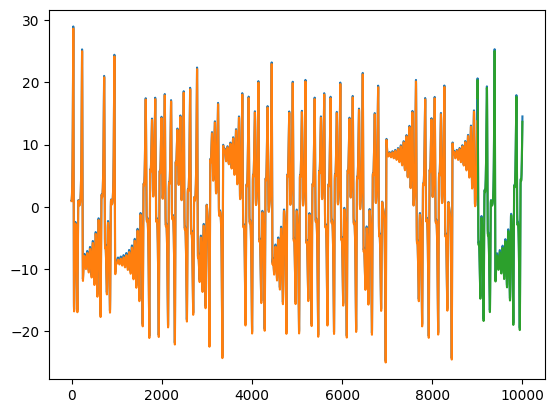

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

dataframe = pd.read_csv('/content/Chaotic_timeseries.csv', usecols=[2], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


train1,test1 = dataset[:-1003],dataset[-1003:]
print(len(train1), len(test1))






import numpy as np

train=[]
for i in range (len(train1)):
  train.append(train1[i][0])

test=[]
for i in range (len(test1)):
  test.append(test1[i][0])


# convert an array of values into a dataset matrix
def create_dataset(dataset):
 dataX, dataY, dataZ, dataW = [], [],[], []
 for i in range(len(dataset)-3):
   a = dataset[i:(i+2)]
   dataX.append(dataset[(i)])
   dataY.append(dataset[(i + 1)])
   dataZ.append(dataset[(i+2)])
   dataW.append(dataset[i+3])

 return np.array(dataX), np.array(dataY), np.array(dataZ), np.array(dataW)


# reshape into X=t and Y=t+1
#look_back = 1
trainX1,trainX2, trainX3, trainY = create_dataset(train)
#valX1, valX2,valX3, valY = create_dataset(test)
testX1, testX2,testX3, testY = create_dataset(test)
trainX2



trainX=[]
for i in range (len(trainX1)):
  trainX.append([trainX1[i],trainX2[i], trainX3[i]])
trainX=pd.DataFrame(trainX)
#print(trainX)



testX=[]
for i in range (len(testX1)):
  testX.append([testX1[i],testX2[i],testX3[i]])
testX=pd.DataFrame(testX)
#print(testX)


import math

from keras import models
from keras import layers
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(layers.Dense(32, input_shape=(3,), activation='relu'))
model.add(layers.Dense(32, activation='relu'))

#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1))



#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])
model.fit(trainX, trainY, epochs=10, batch_size=1024, validation_data=(testX,testY))
# Estimate model performance
trainScore = model.evaluate(trainX, trainY)
print(trainScore)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)



# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[2:len(trainPredict)+2, :] = trainPredict


# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(2*2)+1:len(dataset)-1, :] = testPredict


# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

32/32 [==============================] - 0s 1ms/step
[[17.488338470458984], [18.337759017944336], [19.093767166137695], [19.716407775878906], [20.160980224609375], [20.37994384765625], [20.325912475585938], [19.955913543701172], [19.236696243286133], [18.14530372619629], [16.63890266418457], [14.802491188049316], [12.691376686096191], [10.391522407531738], [8.002416610717773], [5.6294660568237305], [3.4092512130737305], [1.4584187269210815], [-0.10154604911804199], [-1.2140591144561768], [-2.201526165008545], [-3.2447891235351562], [-4.209654331207275], [-4.932758808135986], [-5.447506427764893], [-5.791162967681885], [-6.00056791305542], [-6.109167575836182], [-6.145970344543457], [-6.135061740875244], [-6.095812797546387], [-6.043408393859863], [-5.989478588104248], [-5.94274377822876], [-5.90960168838501], [-5.89463472366333], [-5.901034832000732], [-5.930945873260498], [-5.98573637008667], [-6.066205978393555], [-6.172761917114258], [-6.30552339553833], [-6.464428424835205], [-6.64

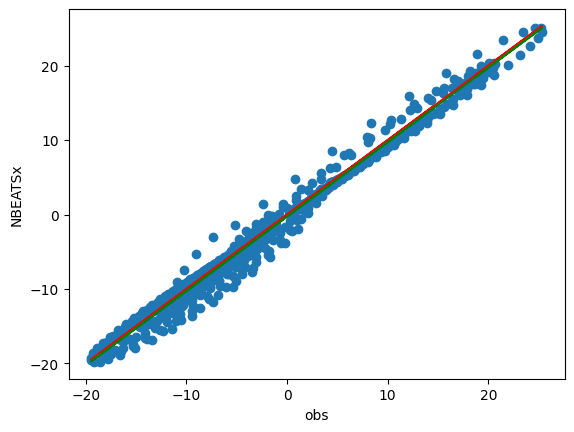

[-1.2335554871788794, -1.1239949314967639, -0.96517161718754, -0.7513384718834146, -0.47913531335288084, -0.14896035521141826, 0.2335182661764783, 0.656096539564281, 1.0993663615415485, 1.5318259952738629, 1.8760383099473668, 2.155777361517835, 2.3419925727049193, 2.4207855905339164, 2.387030240815575, 2.2486080742218344, 2.0621196680301797, 1.8887312906265687, 1.8213356760989088, 1.9128674042131433, 1.8571907999348047, 1.503229669836582, 1.0221290388373419, 0.6161874798328562, 0.28924021134151534, 0.037366493046879334, -0.1478230483204772, -0.2763862144216809, -0.35866764179500876, -0.4042260441729715, -0.42137270699058504, -0.4170474854378252, -0.39686557921125853, -0.36526480859527233, -0.3256825030062602, -0.280732903754763, -0.23237125996399666, -0.18203329277195923, -0.13075261690860174, -0.07925072935314059, -0.028028693498509227, 0.022587082964423466, 0.07237497324083542, 0.12118233925934341, 0.16889246265117563, 0.21538409054363594, 0.2605077537650091, 0.3040615895558467, 0.34

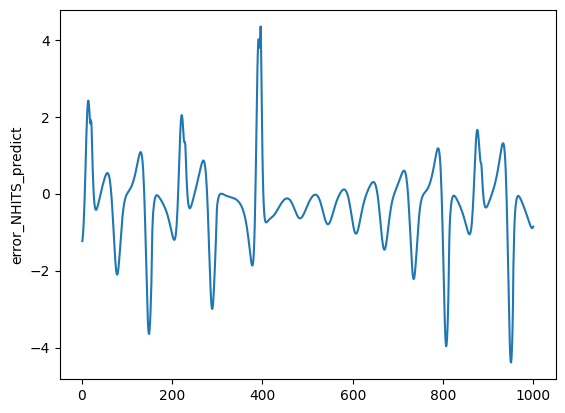

max_error 4.346636985973283
min_error -4.389289443478599
sd_error 1.049279345674571
error
median -0.19685428770748814
25_parcentile -0.6509280034091116
75_parcentile 0.1301898127358898
mae 0.7199169770298347
mse 1.1739194539958115
var_obs 73.63756274746173
var_exp_pred 74.70262852125457
var_error 1.100987145259256
co_variance 73.69329535708563
co_variance_matrix [[73.71127402 73.69329536]
 [73.69329536 74.77740593]]
[17, 34, 32, 34, 11]
[7, 24, 24, 24, 5]
128
[0.4117647058823529, 0.7058823529411765, 0.75, 0.7058823529411765, 0.45454545454545453]


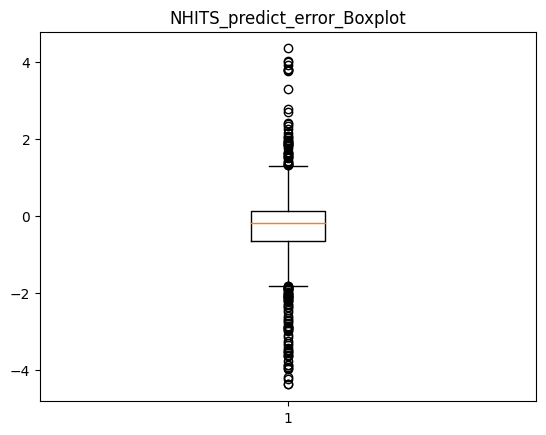

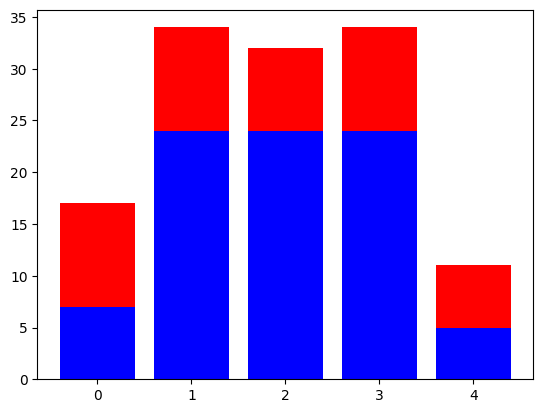

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np


df1=pd.read_csv("/content/Chaotic_timeseries.csv")
obs=df1["Mean_temp"][-1000:].tolist()

forecasts=model.predict(testX)
exp_pred=forecasts.tolist()
print(exp_pred)
pred=[]
for i in range (len(exp_pred)):
  pred.append(exp_pred[i][0])
print(pred)
print(df1["Mean_temp"][-1000:].tolist())





#df=pd.read_csv('/content/deep3.csv')
df1=pd.read_csv("/content/Chaotic_timeseries.csv")
obs=df1["Mean_temp"][-1000:].tolist()
exp_pred=pred





#perfect prediction and recent prediction

plt.scatter(obs, exp_pred)
plt.plot(obs,obs, color='r')

model3 = LinearRegression()
obs = np.array(obs).reshape(-1, 1)
model3.fit(obs, np.array(exp_pred))
y_pred = model3.predict(obs)
plt.plot(obs,y_pred, color='g')


plt.xlabel("obs")
plt.ylabel("NBEATSx")
plt.show()




obs=df1["Mean_temp"][-1000:].tolist()
exp_pred=pred


error=[]
for i in range (len(obs)):
  error.append(exp_pred[i]-obs[i])
print(error)


list1=[]
for i in range (len(obs)):
  list1.append(i+1)
plt.plot(list1,error)
plt.ylabel('error_NHITS_predict')
plt.show()

# information of error

print("max_error", np.max(error))
print("min_error", np.min(error))
print("sd_error", np.std(error))




#error box plot



plt.boxplot(error)
#plt.title("error-Boxplot")
#plt.show()


print("error")
print("median",np.median(error))
print("25_parcentile",np.percentile(error,25))
print("75_parcentile",np.percentile(error,75))

plt.title('NHITS_predict_error_Boxplot')



from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(obs, exp_pred)
mse=mean_squared_error(obs, exp_pred)
var_obs=np.var(obs)
var_exp_pred=np.var(exp_pred)
var_error=np.var(error)
cov=np.cov(obs,exp_pred)[0,1]
cov_matrix=np.cov(obs,exp_pred)

print("mae",mae)
print("mse",mse)
print("var_obs",var_obs)
print("var_exp_pred",var_exp_pred)
print("var_error",var_error)
print("co_variance",cov)
print("co_variance_matrix",cov_matrix)



####


list_obs=[]
list_pred=[]
list_pred1=[]
for i in range (5):
  list_obs.append([])
  list_pred.append([])
  list_pred1.append([])

for i in range (5):
  for j in range (len(obs)):
    if obs[j]>list1[i] and obs[j]<=list1[i+1]:
      list_obs[i].append(obs[j])
      a=obs.index(obs[j])
      list_pred[i].append(pred[a])
#print(list_obs)
#print(list_pred)


for i in range (5):
  for j in range (len(list_pred[i])):
    if list_pred[i][j]>list1[i] and list_pred[i][j]<=list1[i+1]:
      list_pred1[i].append(list_pred[i][j])

len_obs=[]
len_pred=[]
for i in range (5):
  len_obs.append(len(list_obs[i]))
  len_pred.append(len(list_pred1[i]))
print(len_obs)
print(len_pred)
print(np.sum(len_obs))


prop_list=[]
for i in range (5):
  prop_list.append(len_pred[i]/len_obs[i])
print(prop_list)

plt.show()

plt.bar(range(0,5), len_obs, color='r')
plt.bar(range(0,5), len_pred,color='b')

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv('/content/Chaotic_timeseries.csv',index_col='Dates',parse_dates=True)


#x_train = df.iloc[:-1000]
#test = df.iloc[-1000:]
df.sort_index(inplace = True)
# prep a univariate time series for N-Beats
X, y = prep_time_series(df['Mean_temp'], lookback = 3, horizon = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size = 1000)

#from keras.preprocessing.sequence import TimeseriesGenerator

#n_features = 1
#generator = TimeseriesGenerator(train, train, length=n_input, batch_size=1)

#n_input = 3
#generator = TimeseriesGenerator(X_train, y_train , length=n_input)


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


model1 = Sequential()
model1.add(LSTM(400, activation='relu', input_shape=(3, 1)))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mae')

model1.fit(X_train,y_train,epochs=10, validation_data=(X_test,y_test), batch_size=1024)
model1.evaluate(X_test,y_test)


Epoch 1/10
9/9 [==============================] - 9s 618ms/step - loss: 6.6645 - val_loss: 5.0814
Epoch 2/10
9/9 [==============================] - 6s 622ms/step - loss: 3.3411 - val_loss: 2.9806
Epoch 3/10
9/9 [==============================] - 5s 510ms/step - loss: 2.3390 - val_loss: 2.2119
Epoch 4/10
9/9 [==============================] - 6s 662ms/step - loss: 1.8267 - val_loss: 1.6379
Epoch 5/10
9/9 [==============================] - 5s 541ms/step - loss: 1.2929 - val_loss: 1.0480
Epoch 6/10
9/9 [==============================] - 4s 499ms/step - loss: 0.8721 - val_loss: 0.8583
Epoch 7/10
9/9 [==============================] - 6s 736ms/step - loss: 0.7639 - val_loss: 0.7531
Epoch 8/10
9/9 [==============================] - 3s 289ms/step - loss: 0.6878 - val_loss: 0.6338
Epoch 9/10
9/9 [==============================] - 3s 291ms/step - loss: 0.6287 - val_loss: 0.6016
Epoch 10/10
32/32 [==============================] - 0s 8ms/step - loss: 0.5482


0.5481610894203186

32/32 [==============================] - 0s 8ms/step
[[17.664751052856445], [18.419601440429688], [19.073854446411133], [19.59320640563965], [19.93996238708496], [20.074575424194336], [19.958127975463867], [19.555805206298828], [18.841041564941406], [17.800037384033203], [16.435941696166992], [14.772109031677246], [12.854170799255371], [10.747811317443848], [8.548855781555176], [6.370376110076904], [4.314210414886475], [2.4635910987854004], [0.7454184293746948], [-0.7663339376449585], [-2.261751413345337], [-3.528150796890259], [-4.535823345184326], [-5.247375011444092], [-5.71337366104126], [-5.9937663078308105], [-6.141955852508545], [-6.199881076812744], [-6.199098110198975], [-6.163182735443115], [-6.10967493057251], [-6.05160665512085], [-5.998648166656494], [-5.9579315185546875], [-5.934667110443115], [-5.932600498199463], [-5.954362392425537], [-6.001733779907227], [-6.075850963592529], [-6.177368640899658], [-6.306582450866699], [-6.463476657867432], [-6.647828578948975], [-6.8

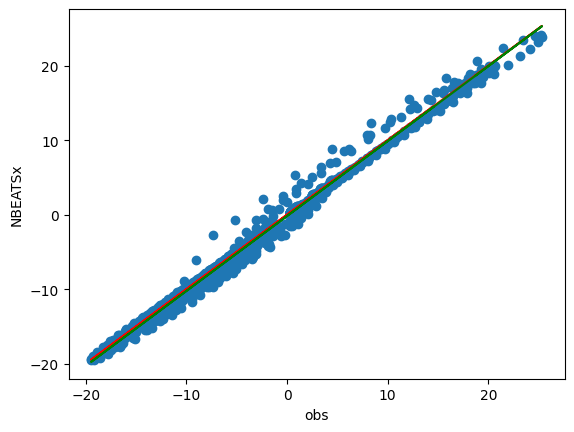

[-1.0571429047814185, -1.0421525090114123, -0.9850843369141025, -0.8745398421226724, -0.7001531508772949, -0.4543287786733323, -0.134266233945592, 0.2559882021619373, 0.703711683196822, 1.186559653110777, 1.6730773419297886, 2.1253952051457645, 2.504786685864099, 2.7770745004460258, 2.933469411652977, 2.9895181274750082, 2.967078869842924, 2.893903662490888, 2.6683001545916456, 2.3605925810243615, 1.7969655515980127, 1.2198679964814794, 0.6959600248602911, 0.3015712765247507, 0.023372978065148153, -0.16523684710204645, -0.2892109877736022, -0.3670997153982434, -0.41179540745052634, -0.43234703874084257, -0.4352348400167081, -0.42524574669881154, -0.40603515776350463, -0.38045254892120006, -0.3507479250643657, -0.3186986782908958, -0.28569882038880134, -0.25282119941868775, -0.2208672104144611, -0.1904133918592441, -0.16184922725095063, -0.1353661793646781, -0.11102518087293411, -0.08876095526580308, -0.06840459545429312, -0.049704944490543745, -0.03234512480554752, -0.01598721949566695

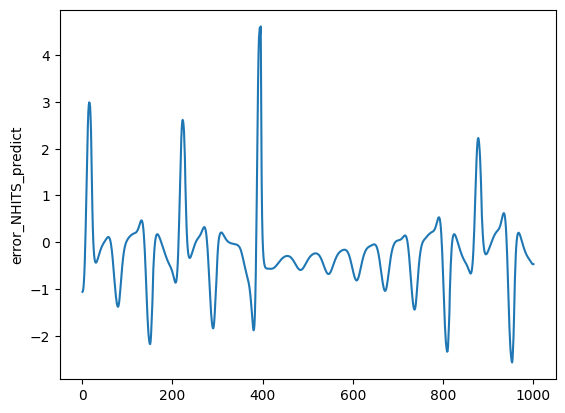

max_error 4.6101956121482095
min_error -2.5667576205662566
sd_error 0.8299616063989668
error
median -0.2354610974813296
25_parcentile -0.5370753204129417
75_parcentile 0.07764675281344036
mae 0.5481610332276182
mse 0.7291239778800681
var_obs 73.63756274746173
var_exp_pred 75.16300206127349
var_error 0.6888362680963533
co_variance 74.12999426458403
co_variance_matrix [[73.71127402 74.12999426]
 [74.12999426 75.2382403 ]]
[17, 34, 32, 34, 11]
[11, 25, 25, 26, 6]
128
[0.6470588235294118, 0.7352941176470589, 0.78125, 0.7647058823529411, 0.5454545454545454]


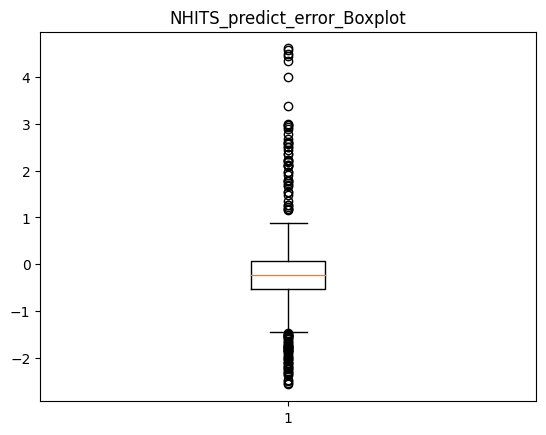

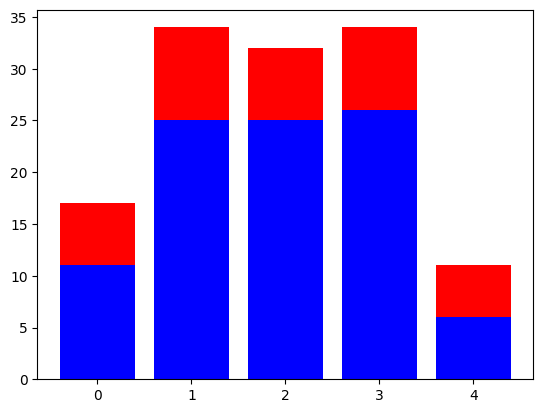

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np


df1=pd.read_csv("/content/Chaotic_timeseries.csv")
obs=df1["Mean_temp"][-1000:].tolist()

forecasts=model1.predict(X_test)
exp_pred=forecasts.tolist()
print(exp_pred)
pred=[]
for i in range (len(exp_pred)):
  pred.append(exp_pred[i][0])
print(pred)
print(df1["Mean_temp"][-1000:].tolist())





#df=pd.read_csv('/content/deep3.csv')
df1=pd.read_csv("/content/Chaotic_timeseries.csv")
obs=df1["Mean_temp"][-1000:].tolist()
exp_pred=pred





#perfect prediction and recent prediction

plt.scatter(obs, exp_pred)
plt.plot(obs,obs, color='r')

model2 = LinearRegression()
obs = np.array(obs).reshape(-1, 1)
model2.fit(obs, np.array(exp_pred))
y_pred = model2.predict(obs)
plt.plot(obs,y_pred, color='g')


plt.xlabel("obs")
plt.ylabel("NBEATSx")
plt.show()




obs=df1["Mean_temp"][-1000:].tolist()
exp_pred=pred


error=[]
for i in range (len(obs)):
  error.append(exp_pred[i]-obs[i])
print(error)


list1=[]
for i in range (len(obs)):
  list1.append(i+1)
plt.plot(list1,error)
plt.ylabel('error_NHITS_predict')
plt.show()

# information of error

print("max_error", np.max(error))
print("min_error", np.min(error))
print("sd_error", np.std(error))




#error box plot



plt.boxplot(error)
#plt.title("error-Boxplot")
#plt.show()


print("error")
print("median",np.median(error))
print("25_parcentile",np.percentile(error,25))
print("75_parcentile",np.percentile(error,75))

plt.title('NHITS_predict_error_Boxplot')



from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(obs, exp_pred)
mse=mean_squared_error(obs, exp_pred)
var_obs=np.var(obs)
var_exp_pred=np.var(exp_pred)
var_error=np.var(error)
cov=np.cov(obs,exp_pred)[0,1]
cov_matrix=np.cov(obs,exp_pred)

print("mae",mae)
print("mse",mse)
print("var_obs",var_obs)
print("var_exp_pred",var_exp_pred)
print("var_error",var_error)
print("co_variance",cov)
print("co_variance_matrix",cov_matrix)


####


list_obs=[]
list_pred=[]
list_pred1=[]
for i in range (5):
  list_obs.append([])
  list_pred.append([])
  list_pred1.append([])

for i in range (5):
  for j in range (len(obs)):
    if obs[j]>list1[i] and obs[j]<=list1[i+1]:
      list_obs[i].append(obs[j])
      a=obs.index(obs[j])
      list_pred[i].append(pred[a])
#print(list_obs)
#print(list_pred)


for i in range (5):
  for j in range (len(list_pred[i])):
    if list_pred[i][j]>list1[i] and list_pred[i][j]<=list1[i+1]:
      list_pred1[i].append(list_pred[i][j])

len_obs=[]
len_pred=[]
for i in range (5):
  len_obs.append(len(list_obs[i]))
  len_pred.append(len(list_pred1[i]))
print(len_obs)
print(len_pred)
print(np.sum(len_obs))


prop_list=[]
for i in range (5):
  prop_list.append(len_pred[i]/len_obs[i])
print(prop_list)

plt.show()

plt.bar(range(0,5), len_obs, color='r')
plt.bar(range(0,5), len_pred,color='b')

plt.show()

ANN=[0.4117647058823529, 0.7058823529411765, 0.75, 0.7058823529411765, 0.45454545454545453]

LSTM=[0.6470588235294118, 0.7352941176470589, 0.78125, 0.7647058823529411, 0.5454545454545454]

NBEATS=[0.7058823529411765, 0.8529411764705882, 0.90625, 0.8235294117647058, 0.8181818181818182]

ANN=mae 0.7199169770298347

mse 1.1739194539958115

LSTM=mae 0.5481610332276182

mse 0.7291239778800681

NBEATS=mae 0.42322485910604685

mse 0.44145245411566314
